In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from poly_reg import *

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
x = np.linspace(-5, 5, 100)
data = x**2 +  np.random.normal(loc=0, scale=3, size=len(x))

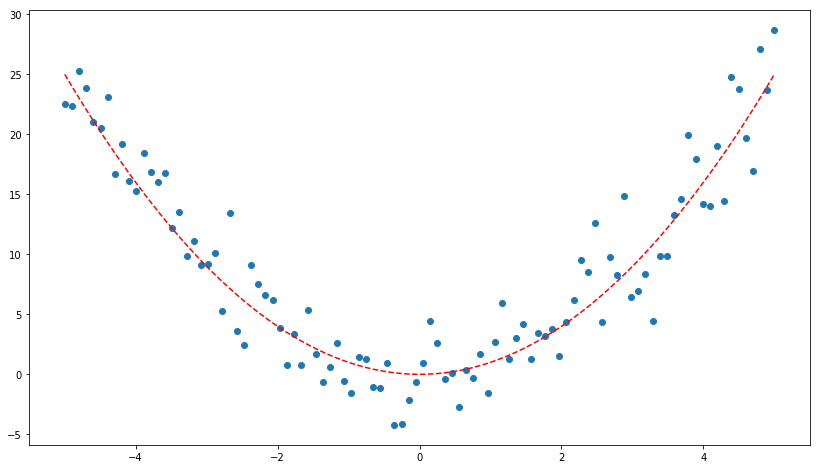

In [19]:
plt.scatter(x, data)
plt.plot(x, x**2, linestyle='--', color='red');

In [20]:
x = np.column_stack((np.ones_like(x) ,x**2))
x

array([[1.00000000e+00, 2.50000000e+01],
       [1.00000000e+00, 2.40001020e+01],
       [1.00000000e+00, 2.30206101e+01],
       [1.00000000e+00, 2.20615243e+01],
       [1.00000000e+00, 2.11228446e+01],
       [1.00000000e+00, 2.02045710e+01],
       [1.00000000e+00, 1.93067034e+01],
       [1.00000000e+00, 1.84292419e+01],
       [1.00000000e+00, 1.75721865e+01],
       [1.00000000e+00, 1.67355372e+01],
       [1.00000000e+00, 1.59192939e+01],
       [1.00000000e+00, 1.51234568e+01],
       [1.00000000e+00, 1.43480257e+01],
       [1.00000000e+00, 1.35930007e+01],
       [1.00000000e+00, 1.28583818e+01],
       [1.00000000e+00, 1.21441690e+01],
       [1.00000000e+00, 1.14503622e+01],
       [1.00000000e+00, 1.07769615e+01],
       [1.00000000e+00, 1.01239669e+01],
       [1.00000000e+00, 9.49137843e+00],
       [1.00000000e+00, 8.87919600e+00],
       [1.00000000e+00, 8.28741965e+00],
       [1.00000000e+00, 7.71604938e+00],
       [1.00000000e+00, 7.16508520e+00],
       [1.000000

# Univariate Polynomial Regression
Simple polynomial regression is a regression model with a single explanatory variable and a single target value.

$$
\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2
$$

## Gradient Descent 

Our task is to find the best possible polynomial that explains all the points in our dataset. We start by guessing initial values for the regression parameters $\theta$ and update the values using gradient descent. 

The objective of polynomial regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2
$$

where the subscript $i$ is the i'th datapoint in the dataset.


$\theta_j$ are parameters of your model and by changing those values accordingly (using **gradient descent**) you will be able to lower the cost function $J(\theta)$:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)x_i^j
$$

In polynomial regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.
